In [96]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [98]:
import matplotlib.gridspec as gridspec

In [100]:
import numpy as np
import pandas as pd

In [102]:
import seaborn as sns

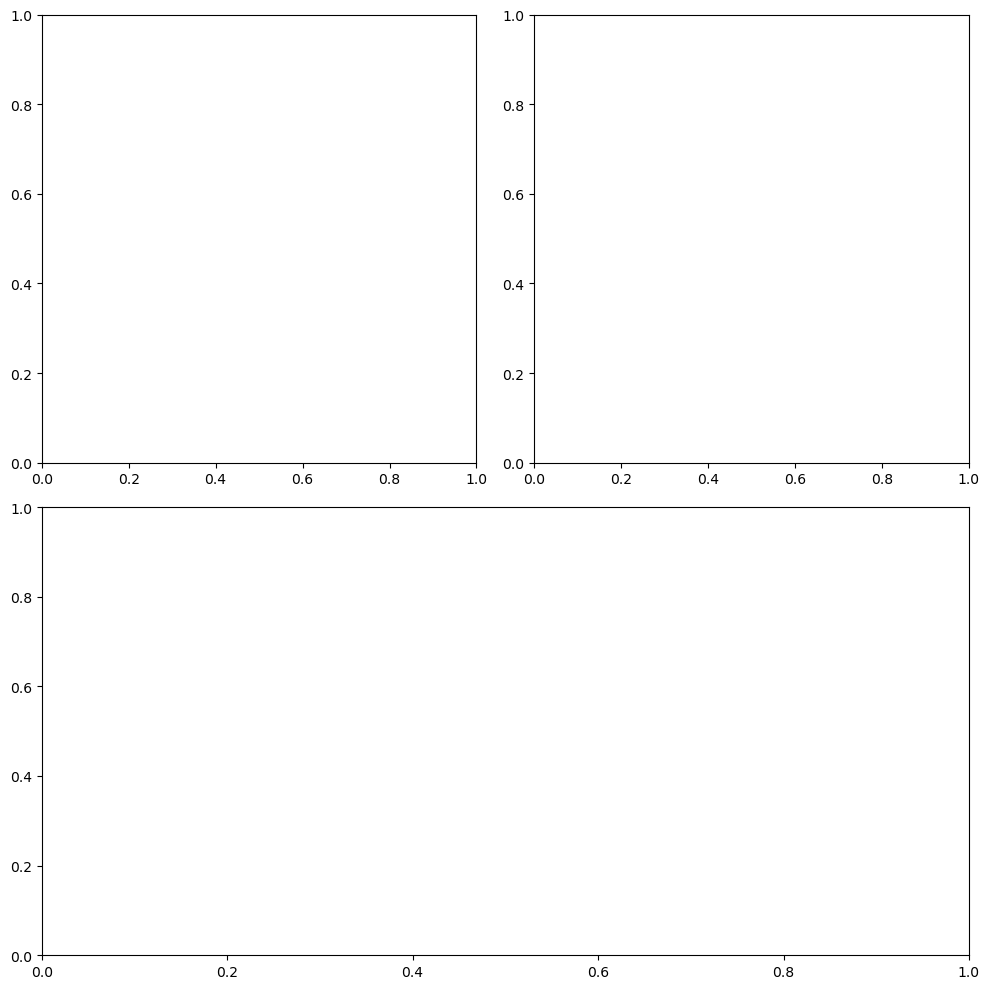

In [8]:
fig = plt.figure(figsize=(10,10))
gs=gridspec.GridSpec(nrows=8,ncols=4)

ax1=fig.add_subplot(gs[0:4,0:2])

ax2=fig.add_subplot(gs[0:4,2:])

ax3=fig.add_subplot(gs[4:,0:])

fig.tight_layout()

In [10]:
housing_raw = pd.read_csv('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',parse_dates=["period_begin", "period_end"])

ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego', 'Tulare']")
)

ca_housing_pivot = (ca_housing
                    .pivot_table(
                        index="period_begin",
                        columns="region_name",
                        values="median_active_list_price"
                    )
)

ca_housing_pivot.head(3)

region_name,Los Angeles,San Diego,San Francisco,Tulare
period_begin,,,,
2017-01-02,611561.0,618570.8,1229018.7,225395.8
2017-01-09,614061.0,621737.5,1233393.7,227729.1
2017-01-16,617311.0,625820.8,1239977.0,229060.4


In [12]:
# data prep to fill layout

LA_SF=(ca_housing
 .query("region_name in ['Los Angeles', 'San Francisco'] and period_begin.dt.year == 2020")
 .pivot_table(index="period_begin",
              columns="region_name",
              values=["total_homes_sold", "median_active_list_price"],
              aggfunc="mean")
             )

two_year = LA_SF.resample("ME").mean()

two_year_LA = (two_year.reset_index()
               .assign(year=lambda x: x.iloc[:, 0].dt.year,
                       month=lambda x: x.iloc[:, 0].dt.month)
               .iloc[:, [0, 3, 5, 6]]
              )

two_year_LA.columns= ["Date", "Homes Sold", "Year", "Month"]

totals_jan = [LA_SF.iloc[0, 1], LA_SF.iloc[0, 0]]

totals_dec = [LA_SF.iloc[-1, 1], LA_SF.iloc[-1, 0]]

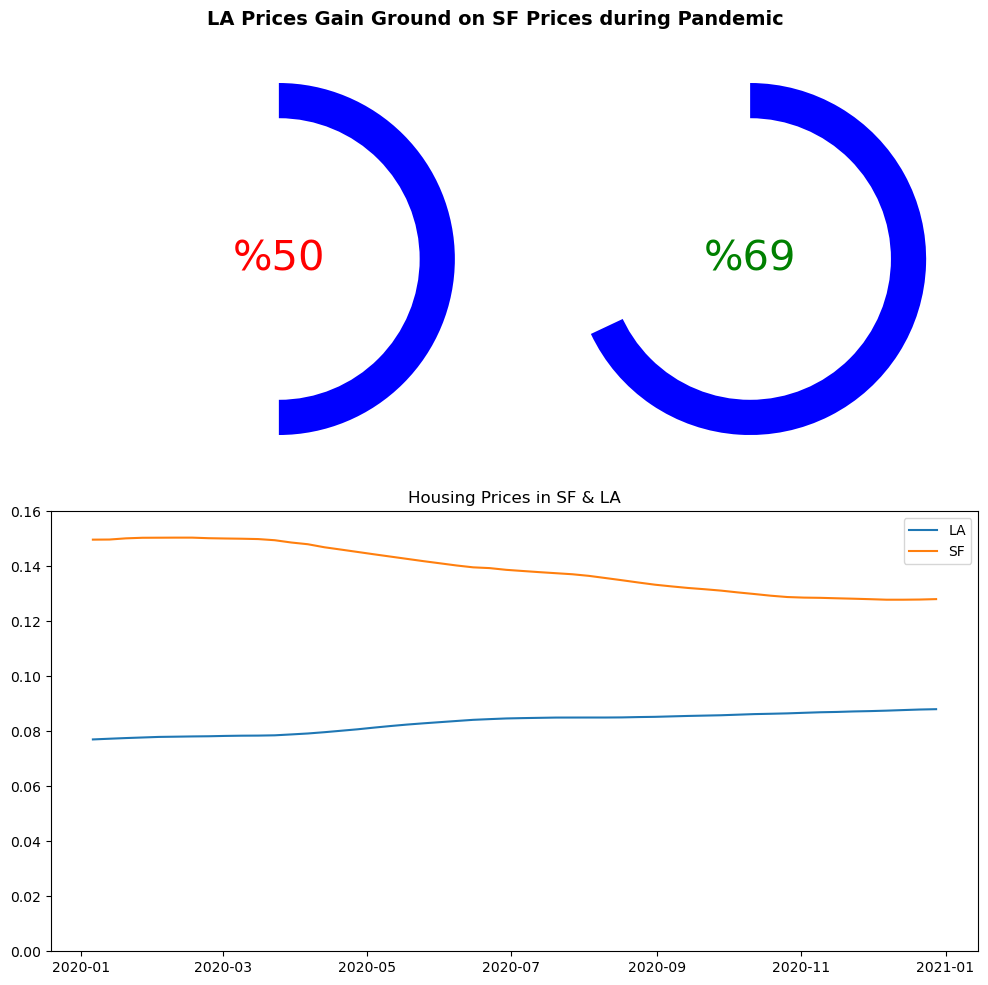

In [14]:
fig = plt.figure(figsize=(10,10))

gs=gridspec.GridSpec(nrows=8,ncols=4)

ax1=fig.add_subplot(gs[0:4,0:2])
ax1.pie(
    x=[.5, .5],
    #autopct="%.0f%%",
    pctdistance=0.8,
    startangle=90,
    colors=["white","blue"]
)

donut_hole=plt.Circle((0,0),0.8,facecolor="white")
fig=plt.gcf()
fig.gca().add_artist(donut_hole)
ax1.text(
    0,0,"%50",ha="center",va="center",fontsize=30,color="red"
)

ax2=fig.add_subplot(gs[0:4,2:])
ax2.pie(
    x=[.32, .68],
    #autopct="%.0f%%",
    pctdistance=0.8,
    startangle=90,
    colors=["white","blue"]
)

hole=plt.Circle((0,0),0.8,facecolor="white")
fig=plt.gcf()
fig.gca().add_artist(hole)
ax2.text(
     0,0,"%69",ha="center",va="center",fontsize=30,color="green"
)


ax=fig.add_subplot(gs[4:,0:])
labels=["LA","SF"]
ax.plot(LA_SF.index,LA_SF.iloc[:, 0:2]/10000000,label=labels)
ax.set_ylim(0,0.16)
ax.legend()
ax.set_title("Housing Prices in SF & LA")



fig.suptitle("LA Prices Gain Ground on SF Prices during Pandemic",fontsize=14,fontweight="bold")

plt.tight_layout()

# Section 2 : Coding Assingment

In [17]:
hotels = pd.read_excel('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/HotelCustomersDataset.xlsx')

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Line Chart Data Prep

hotels = hotels.assign(
    date=pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D"),
    total_revenue=hotels["LodgingRevenue"] + hotels["OtherRevenue"],
)


monthly_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue": "sum", "OtherRevenue": "sum", "total_revenue": "sum"})
    .resample("ME")
    .sum()
)

monthly_revenue.head()

,LodgingRevenue,OtherRevenue,total_revenue
date,,,
2016-01-31,124531.34,52190.50,176721.84
2016-02-29,131689.12,51203.13,182892.25
2016-03-31,443476.86,127336.11,570812.97
2016-04-30,500966.80,145228.87,646195.67
2016-05-31,634200.17,143359.35,777559.52


In [21]:
# Bar Chart Data
rev_by_country = (
    hotels.groupby("Nationality")
    .agg({"total_revenue": "sum"})
    .sort_values("total_revenue", ascending=False)
    .iloc[:5]
)

In [23]:
rev_by_country

,total_revenue
Nationality,
FRA,4842481.89
DEU,3838924.08
PRT,3380643.30
GBR,3284336.38
ESP,1795750.15


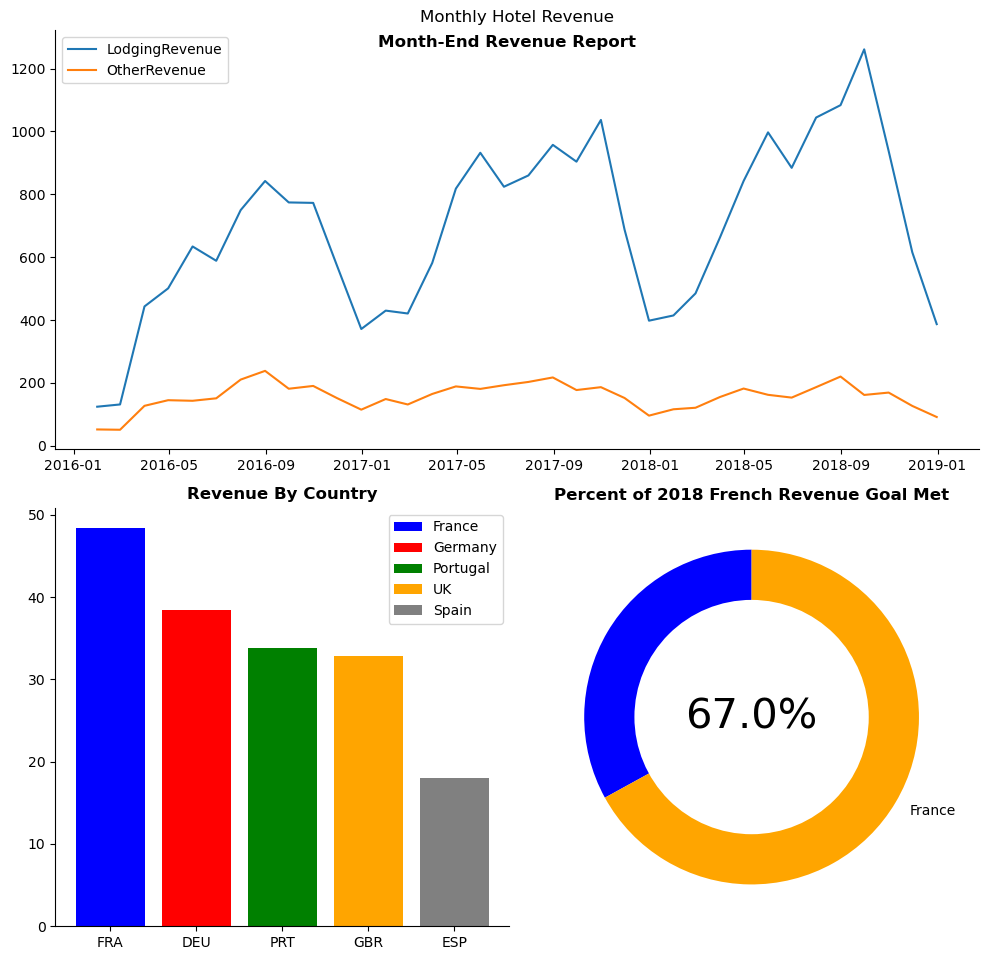

In [25]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,10))

gs=gridspec.GridSpec(nrows=8,ncols=4)

ax1=fig.add_subplot(gs[0:4,0:])
ax1.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"]/1000,monthly_revenue["OtherRevenue"]/1000)
ax1.spines[['top','right']].set_visible(False)
ax1.legend(monthly_revenue.columns)
ax1.set_title("Monthly Hotel Revenue",fontsize=12)


ax2=fig.add_subplot(gs[4:,0:2])
colors=["blue","red","green","orange","grey"]
labels=["France","Germany","Portugal","UK","Spain"]
ax2.bar(
    rev_by_country.index,
    rev_by_country["total_revenue"]/100000,
    color=colors,
    label=labels
)
ax2.spines[['top','right']].set_visible(False)
ax2.set_title("Revenue By Country",fontweight=800)
ax2.legend()


ax3=fig.add_subplot(gs[4:,2:])
ax3.pie(
    x= [0.33, 0.67],
    startangle=90,
    #autopct='%.0f%%'
    pctdistance=0.8,
    labels=["","France"],
    colors=["blue","orange"],
)

donut_hole=plt.Circle((0,0),0.7,facecolor="white")
fig=plt.gcf()
fig.gca().add_artist(donut_hole)

ax3.text(0,0,"67.0%",ha="center",va="center",fontsize=30)

ax3.set_title("Percent of 2018 French Revenue Goal Met",fontsize =12 , fontweight =800)

fig.suptitle("Month-End Revenue Report",fontweight="bold",x=0.512,y=0.93)
fig.tight_layout()

# Section 3 : Assignment - Colors

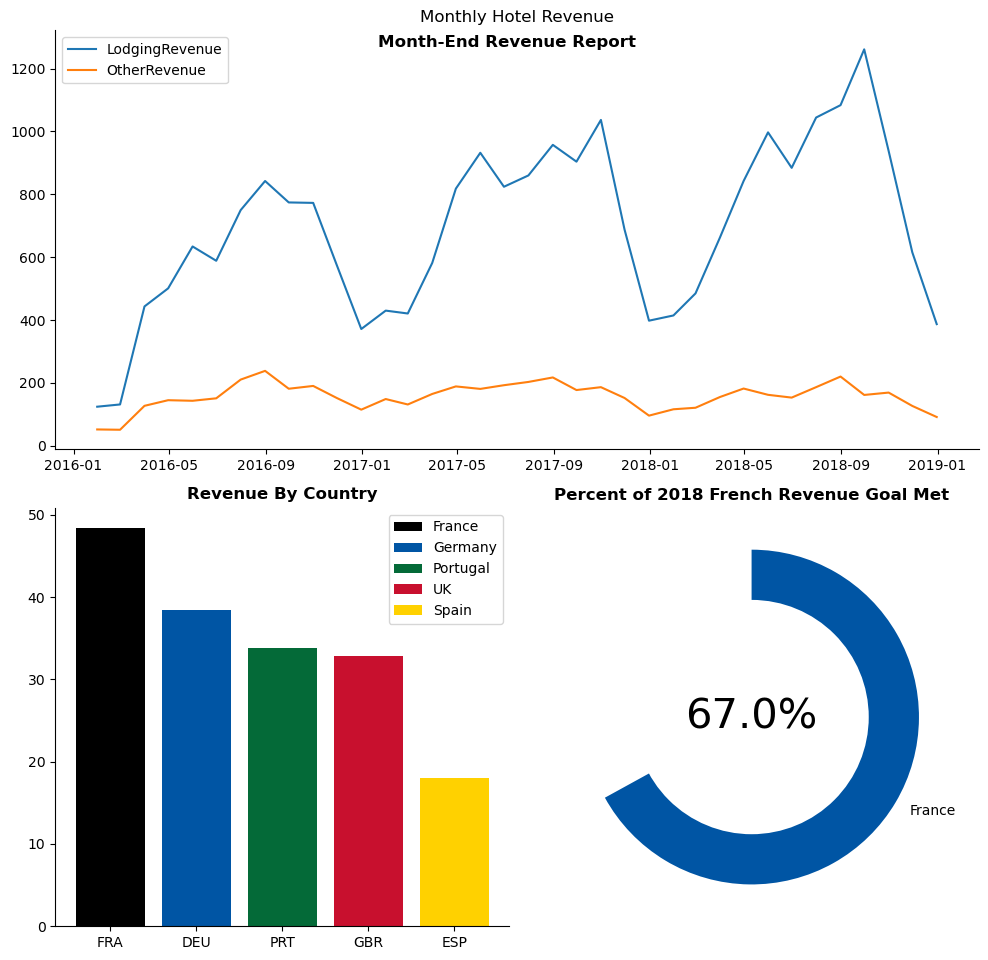

In [131]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,10))

gs=gridspec.GridSpec(nrows=8,ncols=4)

plt.rcParams["axes.prop_cycle"]=plt.cycler("color",plt.cm.Set2.colors)

plt.style.use("default")

ax1=fig.add_subplot(gs[0:4,0:])
ax1.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"]/1000,monthly_revenue["OtherRevenue"]/1000)
ax1.spines[['top','right']].set_visible(False)
ax1.legend(monthly_revenue.columns)
ax1.set_title("Monthly Hotel Revenue",fontsize=12)


ax2=fig.add_subplot(gs[4:,0:2])
colors = ["black", "#0055A4", "#046A38", "#C8102E", "#FFD100"]
labels=["France","Germany","Portugal","UK","Spain"]
ax2.bar(
    rev_by_country.index,
    rev_by_country["total_revenue"]/100000,
    color=colors,
    label=labels
)
ax2.spines[['top','right']].set_visible(False)
ax2.set_title("Revenue By Country",fontweight=800)
ax2.legend()


ax3=fig.add_subplot(gs[4:,2:])
ax3.pie(
    x= [0.33, 0.67],
    startangle=90,
    #autopct='%.0f%%'
    pctdistance=0.8,
    labels=["","France"],
    colors=["white","#0055A4"]
)

donut_hole=plt.Circle((0,0),0.7,facecolor="white")
fig=plt.gcf()
fig.gca().add_artist(donut_hole)

ax3.text(0,0,"67.0%",ha="center",va="center",fontsize=30)

ax3.set_title("Percent of 2018 French Revenue Goal Met",fontsize =12 , fontweight =800)

fig.suptitle("Month-End Revenue Report",fontweight="bold",x=0.512,y=0.93)
fig.tight_layout()

#plt.savefig("Image1.jpeg",dpi=800)

# Section 4 : Style Sheets Assignment

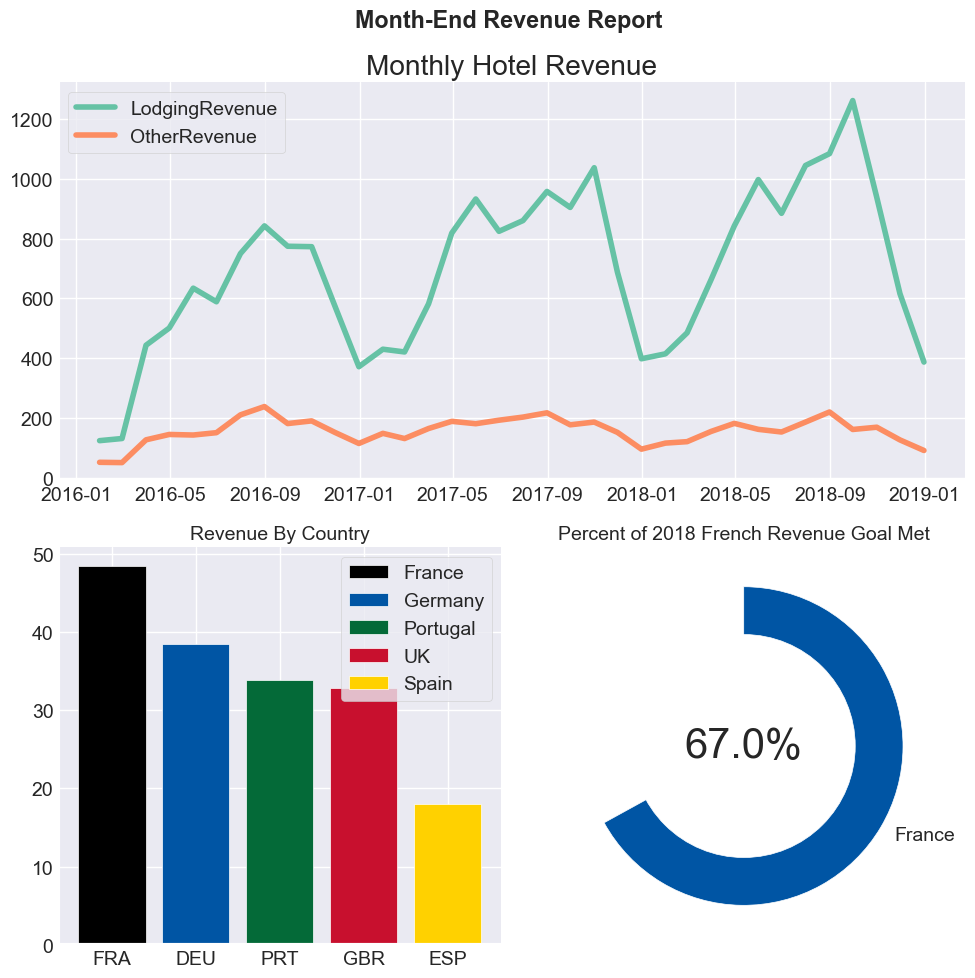

In [126]:
import matplotlib.gridspec as gridspec

import seaborn as sns

sns.set_style("darkgrid")
#plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(10,10))

gs=gridspec.GridSpec(nrows=8,ncols=4)

plt.rcParams["axes.prop_cycle"]=plt.cycler("color",plt.cm.Set2.colors)

ax1=fig.add_subplot(gs[0:4,0:])
ax1.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"]/1000,monthly_revenue["OtherRevenue"]/1000)
ax1.spines[['top','right']].set_visible(False)
ax1.legend(monthly_revenue.columns)
ax1.set_title("Monthly Hotel Revenue")


ax2=fig.add_subplot(gs[4:,0:2])
colors = ["black", "#0055A4", "#046A38", "#C8102E", "#FFD100"]
labels=["France","Germany","Portugal","UK","Spain"]
ax2.bar(
    rev_by_country.index,
    rev_by_country["total_revenue"]/100000,
    color=colors,
    label=labels
)
ax2.spines[['top','right']].set_visible(False)
ax2.set_title("Revenue By Country",fontsize=14)
ax2.legend()


ax3=fig.add_subplot(gs[4:,2:])
ax3.pie(
    x= [0.33, 0.67],
    startangle=90,
    #autopct='%.0f%%'
    pctdistance=0.8,
    labels=["","France"],
    colors=["white","#0055A4"]
)

donut_hole=plt.Circle((0,0),0.7,facecolor="white")
fig=plt.gcf()
fig.gca().add_artist(donut_hole)

ax3.text(0,0,"67.0%",ha="center",va="center",fontsize=30)

ax3.set_title("Percent of 2018 French Revenue Goal Met",fontsize=14)

fig.suptitle("Month-End Revenue Report",fontweight="bold",x=0.52)
fig.tight_layout()